In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import os
num=[]
Z = []
path = '/Users/liuyingjie/Downloads/data/threePoint1/'
#path = '/Users/liuyingjie/Downloads/data/DBSCAN/'
#path = '/Users/liuyingjie/Downloads/data/BP/'
filenames = os.listdir(path)
indexs = []
for filename in filenames:
    if filename.startswith("."):
        continue
    indexs.append(int(filename))
indexs.sort()
#print(indexs)
for index in indexs:
    file_path = path + str(index)
    with open(file_path,'r',encoding='utf8') as f:
        lines=f.readlines()
    #for i in range(99, 119):
    for i in range(34, 54):
        #print(lines[i])
        temps = lines[i].split()
        point=[]
        #point.append(int(temps[2]))
        point.append(float(temps[2])/100)
        #point.append(int(temps[3]))
        point.append(float(temps[3])/100)
        num.append(point)
    for line in lines:
        temps = line.split()
        size = len(temps)
        if(size == 11 and temps[0]=='10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
        if(size == 16 and temps[0] == '10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
            Z.append(int(float(temps[11])*37000000000))
        if(size == 11 and temps[0] == '1000000'):
            #print(temps)
            Z.append(float(temps[1])*100000000)
            Z.append(float(temps[6])*100000000)
        if(size == 16 and temps[0] == '1000000'):
            #print(temps)
            Z.append(float(temps[1])*100000000)
            Z.append(float(temps[6])*100000000)
            Z.append(float(temps[11])*100000000)
            
for i in range(len(Z)):
    num[i].append(Z[i])
print(num)
#num=[[95.0, 96.20000000000002, 29.414], [95.0, 96.40000000000002, 30.573999999999998], [95.0, 96.60000000000002, 31.768], [95.0, 96.80000000000001, 32.976], [95.0, 97.00000000000004, 34.342], [95.0, 97.20000000000003, 35.677], [95.0, 97.40000000000003, 37.012], [95.0, 97.60000000000004, 38.314], [95.0, 97.80000000000004, 39.348], [95.0, 98.00000000000004, 40.387], [95.0, 98.20000000000003, 41.506], [95.0, 98.40000000000005, 42.544], [95.0, 98.60000000000005, 43.479], [95.0, 98.80000000000005, 44.318], [95.80000000000001, 99.00000000000006, 64.029], [95.80000000000001, 99.20000000000006, 65.217], [95.80000000000001, 99.40000000000005, 66.255], [95.80000000000001, 99.60000000000008, 66.532], [95.80000000000001, 99.80000000000007, 66.68], [95.80000000000001, 100.00000000000007, 66.49900000000001], [95.80000000000001, 100.20000000000007, 65.991], [95.80000000000001, 100.40000000000008, 65.194]]
print(len(num))

[[95.0, 95.0, 22.89], [95.0, 95.2, 23.918], [95.0, 95.4, 25.091], [95.0, 95.6, 26.020000000000003], [95.0, 95.80000000000001, 27.192999999999998], [95.0, 96.00000000000001, 28.435], [95.0, 96.20000000000002, 29.414], [95.0, 96.40000000000002, 30.573999999999998], [95.0, 96.60000000000002, 31.768], [95.0, 96.80000000000001, 32.976], [95.0, 97.00000000000004, 34.342], [95.0, 97.20000000000003, 35.677], [95.0, 97.40000000000003, 37.012], [95.0, 97.60000000000004, 38.314], [95.0, 97.80000000000004, 39.348], [95.0, 98.00000000000004, 40.387], [95.0, 98.20000000000003, 41.506], [95.0, 98.40000000000005, 42.544], [95.0, 98.60000000000005, 43.479], [95.0, 98.80000000000005, 44.318], [95.80000000000001, 99.00000000000006, 64.029], [95.80000000000001, 99.20000000000006, 65.217], [95.80000000000001, 99.40000000000005, 66.255], [95.80000000000001, 99.60000000000008, 66.532], [95.80000000000001, 99.80000000000007, 66.68], [95.80000000000001, 100.00000000000007, 66.49900000000001], [95.8000000000000

In [3]:
def getDistance(num1,num2):
    return pow(abs(num1[0]-num2[0]),2)+pow(abs(num1[1]-num2[1]),2)

def setDiffValueOnPrePoint(prePoint,points):
    ans=0
    for point in points:
        distance=getDistance(prePoint,point)
        if distance!=0:
            ans+=abs(point[2]-(prePoint[2]/distance))*(1-distance**0.5*0.0005)
        else:
            ans+=abs(point[2]-prePoint[2])
    if len(prePoint)<4:
        prePoint.append(ans)
    else:
        prePoint[3]=ans

def setValueOnPrePoint(prePoint,point): #放置辐射值数据
    res=point[2]*getDistance(prePoint,point)/(1-getDistance(prePoint,point)**0.5*0.0005)
    if len(prePoint)<3:
        prePoint.append(res)
    else:
        prePoint[2]=res

def createRegion(point,extendTimes,interval):
    pointStart=[point[0]-extendTimes*interval,point[1]+extendTimes*interval]
    pointEnd=[point[0]+extendTimes*interval,point[1]-extendTimes*interval]
    #print(pointStart,pointEnd)
    ans=[]
    pointY,pointX=pointStart[1],pointStart[0]
    while pointY>=pointEnd[1]:
        pointX=pointStart[0]
        while pointX<=pointEnd[0]:
            res=[pointX,pointY]
            ans.append(res)
            pointX+=interval
        pointY-=interval
    #print(ans)
    print(len(ans))
    return ans

def predictForWhile(midPoint,interval,num):
    prePoints=createRegion(midPoint,10,interval)
    """
    pointStart=prePoints[0]
    pointEnd=prePoints[len(prePoints)-1]
    """
    for prePoint in prePoints:
        setValueOnPrePoint(prePoint,num[0])
        setDiffValueOnPrePoint(prePoint,num)
    #print(prePoints)
    prePoints.sort(key=lambda k:k[3])
    """
    if prePoints[0][0]==pointStart[0]:
        midPoint[0]-=interval*4
        return predictForWhile(midPoint,interval,num)
    if prePoints[0][1]==pointStart[1]:
        midPoint[1]+=interval*4
        return predictForWhile(midPoint,interval,num)
    if prePoints[0][0]==pointEnd[0]:
        midPoint[0]+=interval*4
        return predictForWhile(midPoint,interval,num)
    if prePoints[0][0]==pointEnd[1]:
        midPoint[1]-=interval*4
        return predictForWhile(midPoint,interval,num)
    """
    return prePoints

def predict1(num):
    num.sort(key=lambda k:k[2])
    prePoints=createRegion([99.8,99.8],10,0.1)
    for prePoint in prePoints:
        setValueOnPrePoint(prePoint,num[0])
        setDiffValueOnPrePoint(prePoint,num)
    prePoints.sort(key=lambda k:k[3])
    return prePoints[0]

def predict(num,midPoint):
    num.sort(key=lambda k:k[2])
    prePoints=predictForWhile(midPoint,10,num)
    #prePoints=predictForWhile(prePoints[0],10,num)
    prePoints=predictForWhile(prePoints[0],1,num)
    prePoints=predictForWhile(prePoints[0],0.1,num)
    return prePoints[0]

print(len(num))
ans=predict(num,[90,90]) 
print(ans[:2])

40
441
441
441
[99.79999999999995, 99.80000000000007]


[15.999999999999886, 16.039999999999853, 16.039999999999917, 16.159999999999844, 16.159999999999947, 16.35999999999981, 16.35999999999998, 16.63999999999979, 16.64000000000002, 17.000000000000085, 17.440000000000097, 17.96000000000014, 18.560000000000187, 19.240000000000233, 20.000000000000284, 20.840000000000273, 21.760000000000392, 22.76000000000045, 23.840000000000508, 24.03999999999986, 24.479999999999844, 24.99999999999983, 25.00000000000057, 25.599999999999866, 26.27999999999981, 27.039999999999804, 27.8799999999998, 28.799999999999798, 29.799999999999798, 30.87999999999972, 32.03999999999989, 33.27999999999981, 34.599999999999824, 35.99999999999983, 37.47999999999985, 39.039999999999864, 40.68, 42.3999999999999, 44.19999999999992, 46.07999999999995] [66.68, 66.532, 66.49900000000001, 66.255, 65.991, 65.217, 65.194, 64.029, 64.087, 62.677, 61.12799999999999, 59.413000000000004, 57.503, 55.458999999999996, 53.268, 51.203, 49.24, 46.78, 44.809, 44.318, 43.479, 42.544, 42.602, 41.50

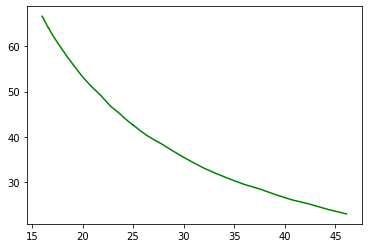

In [5]:
numPoints=[]
for numPoint in num:
    distance=getDistance([99.8,99.8],numPoint)
    res=[distance,numPoint[2]]
    numPoints.append(res)
numPoints.sort(key=lambda k:k[0],reverse=False)
X=[]
Y=[]
for numPoint in numPoints:
    X.append(numPoint[0])
    Y.append(numPoint[1])
print(X,Y)
plt.plot(X,Y,'g-')
plt.show()

In [6]:
def getKandB(prePoint,num):
    num1=num[0]
    num2=num[1]
    distance1,distance2=0,0
    while distance1-distance2==0:
        i=1
        num2=num[i]
        distance1=getDistance(prePoint,num1)
        distance2=getDistance(prePoint,num2)
        i+=1
    K=(num1[2]-num2[2])/(distance1-distance2)
    B=num1[2]-K*distance1
    return [K,B]

def setValue(prePoint,points,kAndB):
    if len(prePoint)<3:
        prePoint.append(kAndB[1])
    else:
        prePoint[2]=kAndB[1]
    res=0
    for point in points:
        res+=kAndB[0]*getDistance(prePoint,point)+kAndB[1]
    if len(prePoint)<4:
        prePoint.append(res)
    else:
        prePoint[3]=res
        
def predict1(num):
    num.sort(key=lambda k:k[2],reverse=True)
    prePoints=createRegion([99.8,99.8],4,0.1)
    for prePoint in prePoints:
        K=getKandB(prePoint,num)
        setValue(prePoint,num,K)
    prePoints.sort(key=lambda k:k[3])
    return prePoints

print(predict1(num))

81
[[100.19999999999995, 99.80000000000003, 138.3120000000426, 1190.1599999990628], [100.09999999999995, 99.80000000000003, 135.0930000000408, 1201.9999999990691], [99.99999999999996, 99.80000000000003, 131.94800000003906, 1213.839999999076], [99.89999999999996, 99.80000000000003, 128.87700000003736, 1225.6799999990828], [99.79999999999997, 99.80000000000003, 125.8800000000357, 1237.51999999909], [99.69999999999997, 99.80000000000003, 122.95700000003407, 1249.3599999990968], [99.59999999999998, 99.80000000000003, 120.10800000003248, 1261.1999999991037], [99.49999999999999, 99.80000000000003, 117.33300000003092, 1273.0399999991107], [99.39999999999999, 99.80000000000003, 114.63200000002941, 1284.8799999991177], [100.19999999999995, 99.90000000000002, 102.51450000001333, 1915.35999999969], [100.09999999999995, 99.90000000000002, 100.9050000000128, 1921.2799999996923], [99.99999999999996, 99.90000000000002, 99.33250000001229, 1927.199999999695], [99.89999999999996, 99.90000000000002, 97.7